In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [25]:
df = pd.read_csv("/content/titanic_toy.csv")

In [26]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [28]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [29]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [32]:
X_train.isnull().mean()*100

,0
Age,20.786517
Fare,5.056180
Family,0.000000


In [33]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [34]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)

In [35]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
810,26.00,7.8875,0,26.00,26.000000,7.8875,7.8875
359,NaN,7.8792,0,28.75,29.785904,7.8792,7.8792
154,NaN,7.3125,0,28.75,29.785904,7.3125,7.3125
644,0.75,19.2583,3,0.75,0.750000,19.2583,19.2583
601,NaN,7.8958,0,28.75,29.785904,7.8958,7.8958


In [36]:
print("Original Age variable variance: ",X_train['Age'].var())
print('Age Variance after median imputation',X_train['Age_median'].var())
print('Age Variance after mean imputation',X_train['Age_mean'].var())


print("Original Fare variable variance: ",X_train['Fare'].var())
print('Fare Variance after median imputation',X_train['Fare_median'].var())
print('Fare Variance after mean imputation',X_train['Fare_mean'].var())



Original Age variable variance:  204.3495133904614
Age Variance after median imputation 161.9895663346054
Age Variance after mean imputation 161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation 2324.9576136149317
Fare Variance after mean imputation 2324.623996772905


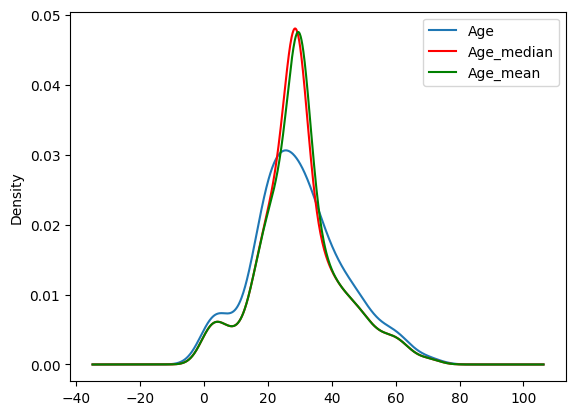

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_median'].plot(kind='kde',ax=ax,color='red')

X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

lines, lables = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

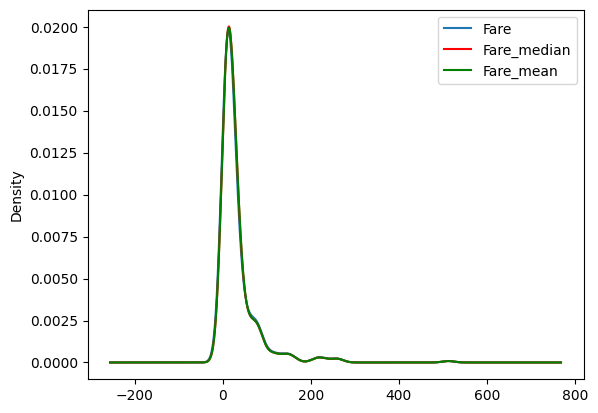

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_median'].plot(kind='kde',ax=ax,color='red')

X_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

lines, lables = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

In [41]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.280487,66.383530
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.404484,16.399278
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,54.710043,54.793876
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.483705,52.565299
Fare_median,66.280487,2448.197914,16.404484,54.710043,52.483705,2324.957614,2324.765012
Fare_mean,66.383530,2448.197914,16.399278,54.793876,52.565299,2324.765012,2324.623997


In [42]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089604,0.089754
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205710,0.205660
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089149,0.089292
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.085568,0.085707
Fare_median,0.089604,1.000000,0.205710,0.089149,0.085568,1.000000,0.999989
Fare_mean,0.089754,1.000000,0.205660,0.089292,0.085707,0.999989,1.000000


<Axes: >

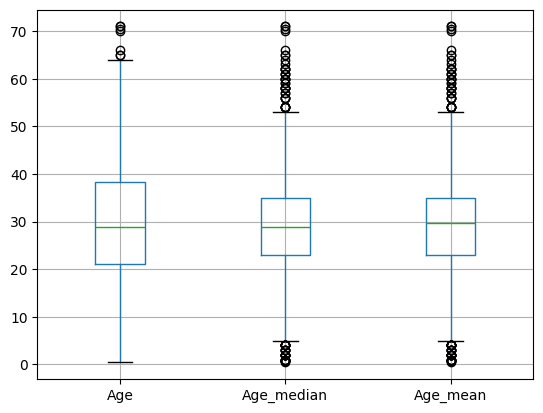

In [44]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

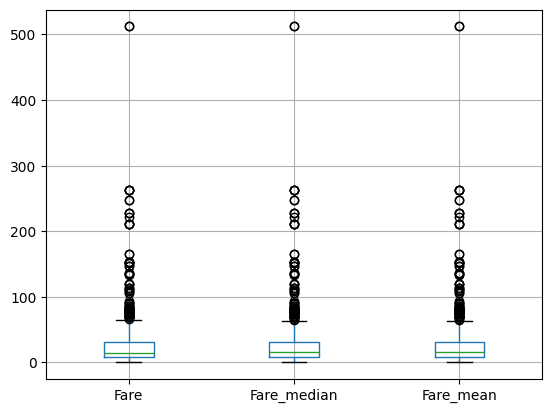

In [45]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

Using Sklearn

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [58]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [59]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [60]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [51]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [63]:
# Re-split the data to ensure X_train and X_test are DataFrames
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Apply the ColumnTransformer
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [64]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

**Aribtary Imputation**

In [65]:
df = pd.read_csv("/content/titanic_toy.csv")

In [68]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [71]:
print("Original Age variable variance: ",X_train['Age'].var())
print('Age Variance after median imputation',X_train['Age_99'].var())
print('Age Variance after mean imputation',X_train['Age_minus1'].var())


print("Original Fare variable variance: ",X_train['Fare'].var())
print('Fare Variance after median imputation',X_train['Fare_999'].var())
print('Fare Variance after mean imputation',X_train['Fare_minus1'].var())



Original Age variable variance:  204.3495133904614
Age Variance after median imputation 951.7275570187172
Age Variance after mean imputation 318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation 47219.20265217623
Fare Variance after mean imputation 2378.5676784883503


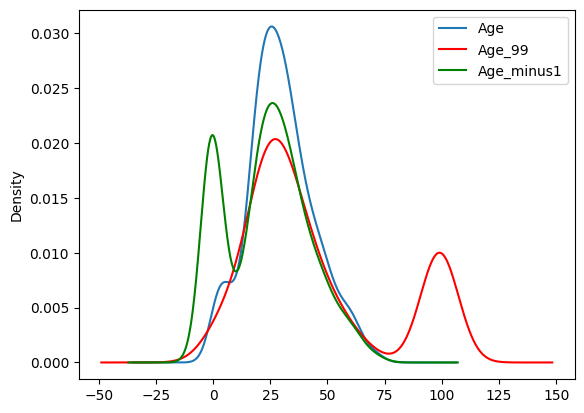

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_99'].plot(kind='kde',ax=ax,color='red')

X_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')

lines, lables = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

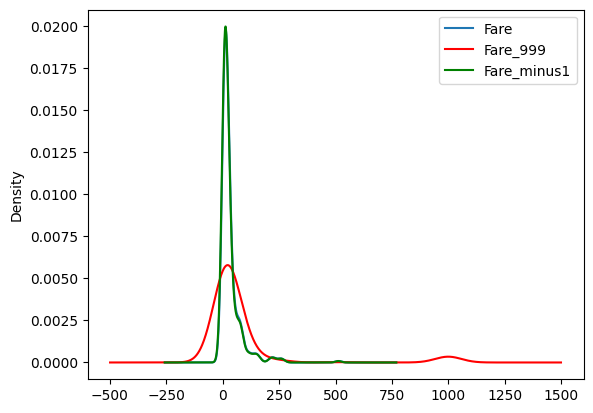

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_999'].plot(kind='kde',ax=ax,color='red')

X_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

lines, lables = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

In [75]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [76]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


Using Sklearn

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [79]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [80]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [81]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [82]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [83]:
# Re-split the data to ensure X_train and X_test are DataFrames
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Apply the ColumnTransformer
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [84]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])